In [16]:
class MyRegressor:
    def _init_(self) -> None:
        self.W = []
        self.X = []

    def get_parameters(self):
        return self.W
    
    def predict(self,x):
        l = []
        for i in range(len(x)):
            c = self.W[0][-1]
            for j in range(len(x[i])):
                c += float(self.W[j+1][-1]) * x[i][j]
            l.append(c)
        return l

    def train(self, training_input_set, training_output_set):
        self.X = [[1] + x.copy() for x in training_input_set]
        XT = self.__transpose_matrix(self.X)
        P = self.__product(XT,self.X)
        P_Invers = self.__inversa(P)
        A = self.__product(P_Invers,XT)
        Y = [[el] for el in training_output_set.copy()]
        self.W = self.__product(A,Y)
        
        
    def __transpose_matrix(self, A):
        n, m = len(A), len(A[-1])
        XT = [[] for _ in range(m)]
        for i in range(n):
            for j in range(m):
                XT[j].append(A[i][j])
        return XT

    def __product(self,A,B):
        nr_lines = len(A)
        nr_cols = len(B[-1])
        prod = []
        for i in range(nr_lines):
            prod.append([])
            for j in range(nr_cols):
                prod[i].append(sum([A[i][k] * B[k][j] for k in range(len(A[i]))]))
        return prod          

    def __elimLinCol(self, A, i:int, j:int):
        B  = [ A[k].copy() for k in range(len(A)) if k != i ]
        for line in B:
            line.pop(j)
        return B

    def __determinant(self, A):
        if len(A) == 1:
            return A[-1][-1]
        return sum(((-1) ** j) * A[0][j] * self.__determinant(self.__elimLinCol(A,0,j)) for j in range(len(A[0])))

    def __inversa(self, A):
        dA = self.__determinant(A)
        B = []
        nr_lines = len(A)
        nr_cols = len(A[-1])
        for i in range(nr_lines):
            B.append([])
            for j in range(nr_cols):
                B[i].append(((-1) ** (i+j)) * self.__determinant(self.__elimLinCol(A,i,j))/dA)
        return B

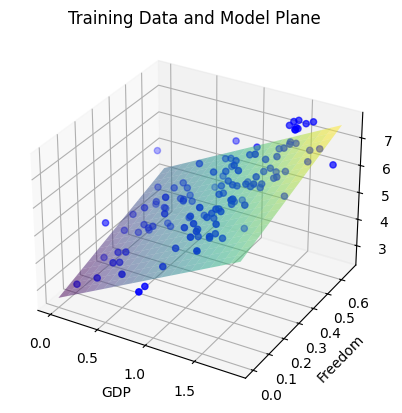

f(x) = 2.617238468723113 + 1.7941440882833135*x1+ 2.398950475187752*x2
Eroare: 0.35090779597391586


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def readDatas(dataPath: str):
    df = pd.read_csv(dataPath,delimiter=',', header='infer')
    return df.dropna()

def getTrainingAndValidationSets2(df_world_happiness):
    dataSize = df_world_happiness.shape[0]
    trainingIndexSet = np.random.choice(range(dataSize),size=int(0.8 * dataSize),replace=False)
    validationIndexSet = [i for i in range(dataSize) if i not in trainingIndexSet] 

    trainingInputSet = [[df_world_happiness["Economy..GDP.per.Capita."].iloc[index], df_world_happiness["Freedom"].iloc[index]] for index in trainingIndexSet ]
    trainingOutputSet = [df_world_happiness["Happiness.Score"].iloc[index] for index in trainingIndexSet ]

    validationInputSet = [[df_world_happiness["Economy..GDP.per.Capita."].iloc[index],df_world_happiness["Freedom"].iloc[index]] for index in validationIndexSet ]
    validationOutputSet = [df_world_happiness["Happiness.Score"].iloc[index] for index in validationIndexSet ]
    
    return trainingInputSet, trainingOutputSet, validationInputSet, validationOutputSet


def happinessByGDPAndFreedom(world_happiness):
    
    training_input_set, training_output_set, validation_input_set, validation_output_set = getTrainingAndValidationSets2(world_happiness)
    regressor = MyRegressor()
    regressor.train(training_input_set, training_output_set)
    
    W = regressor.get_parameters()
    w0, w1, w2 = W[0][-1], W[1][-1], W[2][-1]

    # Generate data for plotting the plane
    x_min, x_max = np.min(training_input_set, axis=0)[0], np.max(training_input_set, axis=0)[0]
    y_min, y_max = np.min(training_input_set, axis=0)[1], np.max(training_input_set, axis=0)[1]
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 20), np.linspace(y_min, y_max, 20))
    zz = w0 + w1 * xx + w2 * yy

    # Plot the data points
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    training_input_set2 = np.array(training_input_set)
    training_output_set2 = np.array(training_output_set)
    ax.scatter(training_input_set2[:,0], training_input_set2[:,1], training_output_set, c='b', marker='o', label='Training Data')
    
    # Plot the plane representing the model
    ax.plot_surface(xx, yy, zz, alpha=0.5, cmap='viridis', label='Model Plane')
    
    ax.set_title('Training Data and Model Plane')
    ax.set_xlabel('GDP')
    ax.set_ylabel('Freedom')
    ax.set_zlabel('Happiness')
    
    plt.show()

    
    print("f(x) = {} + {}*x1+ {}*x2".format(w0,w1,w2))

    # Eroare
    computedValidationOutputs = regressor.predict([x for x in validation_input_set])
    manualError = 0.0
    for t1, t2 in zip(computedValidationOutputs, validation_output_set):
        manualError += (t1 - t2) ** 2
    manualError = manualError / len(validation_output_set)
    print("Eroare: {}".format(manualError))


world_happiness_v1 = readDatas("v1_world-happiness-report-2017.csv")
happinessByGDPAndFreedom(world_happiness_v1)

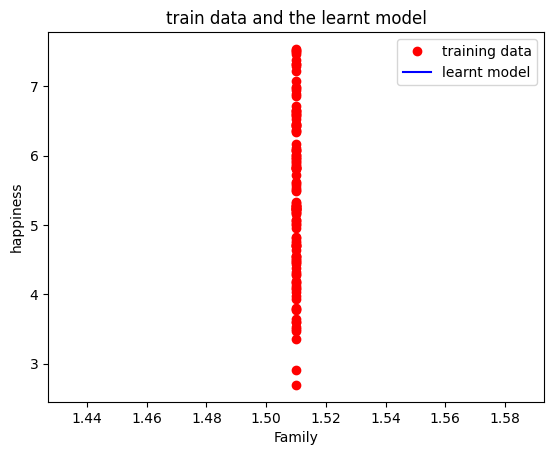

f(x) = -3.939035159531248 + 5.908552739296873*x
Eroarea:  1.0955211705742913


In [18]:
def getTrainingAndValidationSets3(df_world_happiness):
    dataSize = df_world_happiness.shape[0]
    trainingIndexSet = np.random.choice(range(dataSize),size=int(0.8 * dataSize),replace=False)
    validationIndexSet = [i for i in range(dataSize) if i not in trainingIndexSet] 

    trainingInputSet = [df_world_happiness["Family"].iloc[index] for index in trainingIndexSet ]
    trainingOutputSet = [df_world_happiness["Happiness.Score"].iloc[index] for index in trainingIndexSet ]

    validationInputSet = [df_world_happiness["Family"].iloc[index] for index in validationIndexSet ]
    validationOutputSet = [df_world_happiness["Happiness.Score"].iloc[index] for index in validationIndexSet ]
    
    return trainingInputSet, trainingOutputSet, validationInputSet, validationOutputSet

def happinessByFamily(df_world_happiness):
    
    trainingInputSet, trainingOutputSet, validationInputSet, validationOutputSet = getTrainingAndValidationSets3(df_world_happiness)
    newTrainingInputSet = [[el] for el in trainingInputSet]
    regressor = MyRegressor()
    regressor.train(newTrainingInputSet,trainingOutputSet)
    w0, w1 = regressor.get_parameters()[0][-1], regressor.get_parameters()[1][-1]
    noOfPoints = 1000
    xref = []
    val = min(trainingInputSet)
    step = (max(trainingInputSet) - min(trainingInputSet)) / noOfPoints
    for i in range(1, noOfPoints):
        xref.append(val)
        val += step
    yref = [w0 + w1 * el for el in xref] 

    fix,axes = plt.subplots()

    axes.plot(trainingInputSet, trainingOutputSet, 'ro', label = 'training data')  #train data are plotted by red and circle sign
    axes.plot(xref, yref, 'b-', label = 'learnt model')                  #model is plotted by a blue line
    axes.set_title('train data and the learnt model')
    axes.set_xlabel('Family')
    axes.set_ylabel('happiness')
    axes.legend()
    plt.show()

    print("f(x) = {} + {}*x".format(w0,w1))

    computedValidationOutputs = regressor.predict([[x] for x in validationInputSet])
    manualError = 0.0
    for t1, t2 in zip(computedValidationOutputs, validationOutputSet):
        manualError += (t1 - t2) ** 2
    manualError = manualError / len(validationOutputSet)
    print("Eroarea: ",manualError)
happinessByFamily(world_happiness_v1)

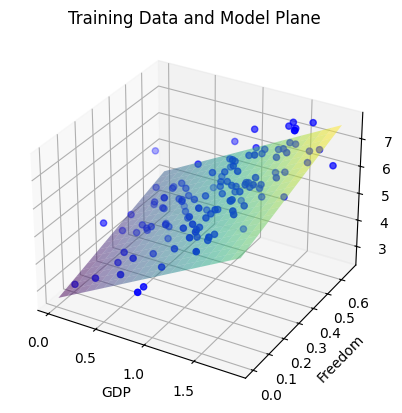

f(x) = 2.603459755150594 + 1.8833780578184518*x1+ 2.2145323066728047*x2
Eroare: 0.3176406948863594


In [19]:
world_happiness_v1 = readDatas("v1_world-happiness-report-2017.csv")
happinessByGDPAndFreedom(world_happiness_v1)